In [1]:
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.load('calibration/stereo.npz')
cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, Tr, E, F = data['arr_0'], data[
    'arr_1'], data['arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6'], data['arr_7']

data = np.load('calibration/rectify.npz')
R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = data['arr_0'], data['arr_1'], data[
    'arr_2'], data['arr_3'], data['arr_4'], data['arr_5'], data['arr_6']

pts1 = np.array([
    [444, 842],
    [466, 853],
    [488, 896],
    [466, 853],
    [466, 857],
    [464, 847],
    [493, 869],
    [500, 868],
    [488, 896],
    [484, 925],
    [497, 870],
    [320, 849],
    [371, 843],
    [344, 851],
    [360, 844],
    [408, 864],
    [333, 839],
    [366, 844],
    [333, 839],
    [372, 828],
    [372, 828]
])

pts2 = np.array([
    [355, 845],
    [375, 855],
    [396, 901],
    [375, 855],
    [375, 860],
    [474, 817],
    [401, 873],
    [408, 872],
    [396, 901],
    [474, 817],
    [499, 837],
    [375, 860],
    [443, 932],
    [462, 911],
    [452, 929],
    [478, 799],
    [434, 926],
    [478, 799],
    [496, 910],
    [497, 923],
    [496, 910]])

x = []
y = []
z = []
for p1, p2 in zip(pts1, pts2):
    pt3D = cv2.triangulatePoints(P1, P2, p2, p1)
    pt3D = pt3D / pt3D[-1]
    x.append(pt3D[0][0])
    y.append(pt3D[1][0])
    z.append(pt3D[2][0])

(<matplotlib.image.AxesImage at 0x7f8b541aae20>, 444, 842)

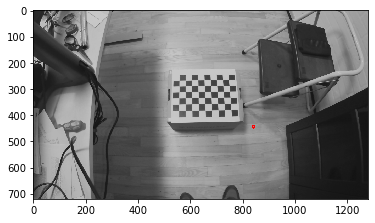

In [2]:
img = cv2.imread('calibration/data/left-0000.png')
img = cv2.circle(img, (int(pts1[0][1]),int(pts1[0][0])), radius=5, color=(255,0,0), thickness=3)
plt.imshow(img), int(pts1[0][0]),int(pts1[0][1])

In [3]:
pts1.reshape(2,-1)

array([[444, 842, 466, 853, 488, 896, 466, 853, 466, 857, 464, 847, 493,
        869, 500, 868, 488, 896, 484, 925, 497],
       [870, 320, 849, 371, 843, 344, 851, 360, 844, 408, 864, 333, 839,
        366, 844, 333, 839, 372, 828, 372, 828]])

In [4]:
P1,P2

(array([[705.03056853,   0.        , 782.40831757,   0.        ],
        [  0.        , 705.03056853, 293.99384308,   0.        ],
        [  0.        ,   0.        ,   1.        ,   0.        ]]),
 array([[7.05030569e+02, 0.00000000e+00, 7.82408318e+02, 2.51750991e+03],
        [0.00000000e+00, 7.05030569e+02, 2.93993843e+02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]]))

In [15]:
pts1 = np.array([
 [925,361],
 [947,372],
 [969,415],
 [947,372],
 [947,376]])
pts2 = np.array([
 [836, 364],
 [856, 374],
 [877, 420],
 [856, 374],
 [856, 379]])

pts1 = np.array([
 [925, 361],
 [947, 372],
 [969, 415],
 [947, 372],
 [947, 376],
 [945, 366],
 [974, 388],
 [981, 387],
 [969, 415],
 [965, 444]])

pts2 = np.array([
 [836, 364],
 [856, 374],
 [877, 420],
 [856, 374],
 [856, 379],
 [955, 336],
 [882, 392],
 [889, 391],
 [877, 420],
 [955, 336]])

pts1,pts2.T.shape

(array([[925, 361],
        [947, 372],
        [969, 415],
        [947, 372],
        [947, 376],
        [945, 366],
        [974, 388],
        [981, 387],
        [969, 415],
        [965, 444]]),
 (2, 10))

In [18]:
pts3D = cv2.triangulatePoints(P1, P2, pts1.T,pts2.T)
pts3D.T

array([[  910568299,   910568299,  1312219613, -1738259851],
       [ 1072096675,  1072096675,  1070675220, -1075535376],
       [  910568299,   910568299,  1312219613, -1738259851],
       [ 1072096675,  1072096675,  1070675220, -1075535376],
       [  910568299, -1769903649,  -330210838,  -671359662],
       [ 1072096675,  1072093876,  1070702492, -1075538031],
       [  910568299,  1702545316, -1525787999,  1325108549],
       [ 1072096675,  1072094846,  1070692977, -1075537080],
       [  910568299,  -852390790,  -722214862,  2054413160],
       [ 1072096675,  1072099549,  1070647781, -1075532920]], dtype=int32)

In [22]:
x = []
y = []
z = []
for i in range(10):
    print(pts3D.T[i] / pts3D.T[i][-1])
    p  = pts3D.T[i] / pts3D.T[i][-1]
    x.append(p[0])
    y.append(p[1])
    z.append(p[2])

[-0.523839   -0.523839   -0.75490417  1.        ]
[-0.9968028  -0.9968028  -0.99548118  1.        ]
[-0.523839   -0.523839   -0.75490417  1.        ]
[-0.9968028  -0.9968028  -0.99548118  1.        ]
[-1.35630475  2.63629728  0.49185386  1.        ]
[-0.99680034 -0.99679774 -0.99550407  1.        ]
[ 0.68716506  1.2848346  -1.15144378  1.        ]
[-0.99680122 -0.99679952 -0.99549611  1.        ]
[ 0.4432255  -0.41490719 -0.35154314  1.        ]
[-0.99680508 -0.99680775 -0.99545794  1.        ]


In [28]:
sum(x)/10, sum(y)/10, sum(z)/10
# could actually project to the camera and see if it lands!

(-0.6257604424670512, -0.25254639146957414, -0.7498361883135978)

In [7]:
pts3D = cv2.triangulatePoints(P1, P2, pts1.reshape(2,-1),pts2.reshape(2,-1))

x = []
y = []
z = []
for pt3D in pts3D.T:
    
    p = pt3D.copy()
    print(p)
    if p[-1] != 0 and abs(p[-1]) != 1:
        p = p / p[-1]
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])
x

[  910568299  1072096675  1070675220 -1075535376]
[ 1072096675   910568299  1312219613 -1738259851]
[  910568299  1072096675  1070675220 -1075535376]
[ 1072096675   910568299  1312219613 -1738259851]
[  910568299  1072096675  1070675220 -1075535376]


[-0.8466186415796704,
 -0.616764331514207,
 -0.8466186415796704,
 -0.616764331514207,
 -0.8466186415796704]

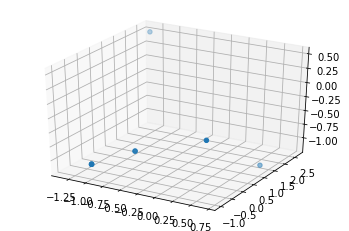

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
ax.scatter3D(x[:10], y[:10], z[:10])
plt.show()